In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('sample_data/20191129_A028300.xlsx')

<Figure size 432x288 with 0 Axes>

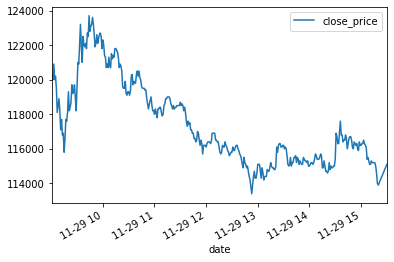

In [10]:
fig = plt.figure()
df.plot(x='date', y='close_price')

In [27]:

def smooth(x, window_len=11, window='hanning'):
    
    if x.ndim != 1:
        raise ValueError('only accept 1 dim')
    
    if x.size < window_len:
        raise ValueError('x len too short')

    if window_len < 3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y
    

In [53]:
df['avg'] = df['close_price'].rolling(40).mean()

In [55]:
from scipy.signal import argrelextrema

In [59]:
df['avg'].to_numpy()
#argrelextrema(df['avg'], np.less)

array([     nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan, 119417.5, 119455. , 119522.5,
       119562.5, 119655. , 119720. , 119810. , 119937.5, 120065. ,
       120172.5, 120282.5, 120402.5, 120512.5, 120657.5, 120787.5,
       120952.5, 121102.5, 121227.5, 121350. , 121442.5, 121517.5,
       121612.5, 121687.5, 121752.5, 121777.5, 121820. , 121855. ,
       121895. , 121940. , 122002.5, 122050. , 122055. , 122067.5,
       122050. , 122015. , 122012.5, 122030. , 122007.5, 121990. ,
       121960. , 121930. , 121905. , 121850. , 121777.5, 121672.5,
       121590. , 121510. , 121410. , 121297.5, 121200. , 12111